In [1]:
from train import train_cnn
from train import plot_loss
from visualization import show, predict_image
from visualization import read_preview_images
import cv2, csv
import numpy as np


Using TensorFlow backend.


/home/carnd/SelfDrivingCarND-Proj4/train.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), name="conv1", activation="relu", strides=(2, 2))`
  model.add(Conv2D(24, (5, 5), subsample=(2,2), activation='relu',name='conv1'))
/home/carnd/SelfDrivingCarND-Proj4/train.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), name="conv2", activation="relu", strides=(2, 2))`
  model.add(Conv2D(36, (5, 5), subsample=(2,2), activation='relu', name='conv2'))
/home/carnd/SelfDrivingCarND-Proj4/train.py:48: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), name="conv3", activation="relu", strides=(2, 2))`
  model.add(Conv2D(48, (5, 5), subsample=(2,2), activation='relu', name='conv3'))


Epoch 1/5
43/42 [==============================] - 72s 2s/step - loss: 0.0240 - val_loss: 0.0171
Epoch 2/5
43/42 [==============================] - 69s 2s/step - loss: 0.0165 - val_loss: 0.0157
Epoch 3/5
43/42 [==============================] - 69s 2s/step - loss: 0.0155 - val_loss: 0.0146
Epoch 4/5
43/42 [==============================] - 69s 2s/step - loss: 0.0148 - val_loss: 0.0140
Epoch 5/5
43/42 [==============================] - 69s 2s/step - loss: 0.0140 - val_loss: 0.0140
dict_keys(['val_loss', 'loss'])


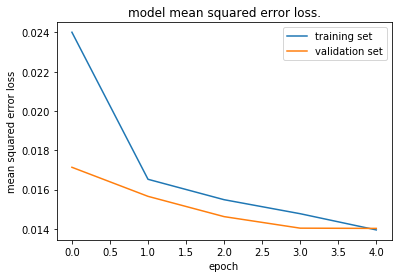

In [5]:
history_object = train_cnn("model_norm_255_no_side_flip_more_steps.h5")
plot_loss(history_object,"model_norm_255_no_side_flip_more_steps.h5")

In [3]:
#img_path = 'train_data/IMG/'
#img_name = 'center_2018_11_05_20_43_17_113.jpg'
#img = cv2.imread(img_path + img_name)
#img = img / 127.0 - 1
#cv2.imwrite("test.jpg", image)
#predict_image(img, img_name, "model_norm_127_no_side_flip.h5", "crop")

In [ ]:
norm, out_norm=show()

In [ ]:
#from keras.utils import plot_model
#plot_model(model, to_file='model.png')